In [121]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv('dc_airbnb.csv')
keep_col = ['accommodates','bedrooms','bathrooms','beds','price','number_of_reviews']
#keep_col = ['accommodates','price']
dc_listings = dc_listings[keep_col]
print(dc_listings.shape)

dc_listings.dropna(inplace=True)
print(dc_listings.shape)
null_counts = dc_listings.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

dc_listings['price'] = dc_listings.price.str.replace("\$|,",'').astype(float)

#weights = dc_listings[['accommodates','bedrooms','bathrooms','beds']]
#prices = dc_listings['price']

#print(weights.shape)
#print(prices.shape)

#print(weights.head())
#print(prices.head())





(3723, 6)
(3671, 6)
Number of null values in each column:
accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
number_of_reviews    0
dtype: int64


In [126]:
import tensorflow as tf
import numpy as np


target_fields = ['price']
X, Y = dc_listings.drop(target_fields, axis=1), dc_listings[target_fields]
X_train, Y_train = X[:3000], Y[:3000]
X_test, Y_test = X[3000:], Y[3000:]
#X_test = weights.copy().iloc[3000:]
#Y_test = prices.copy().iloc[3000:]

predicted_price = 1 # numbers of 0-9
n_features = 5 #per image = 28*28

X = tf.placeholder(tf.float32, shape = (None, n_features)) # 100 x 784 fed by training images
Y_real = tf.placeholder(tf.float32, shape = (None, 1)) # 10 fed by training image labels

### Define W,b: with zeros and then global_variables_initialize() or xavier_initializer
W = tf.Variable(tf.zeros([n_features, 1])) 
b = tf.Variable(tf.zeros(1)) 
Y_pred = tf.matmul(X,W) + b 

### Cost: Cross_entropy (Study about costs)
cost = tf.reduce_mean(tf.square(Y_pred-Y_real))

 
### Train: GradientDescentOptimizer (study different optimizers)
#train_op = tf.train.AdamOptimizer(0.001).minimize(cost)
train_op = tf.train.AdamOptimizer(0.01).minimize(cost)

#cost_history = np.empty(shape=[1],dtype=float)

### Initialization: global_variables_initialize()
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

TRAIN_STEP = 14000

for i in range(TRAIN_STEP):
	sess.run(train_op,feed_dict={X: X_train, Y_real:Y_train})
    #cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: X_train,Y_real: Y_train}))
	if i % 1000 == 0:
		print("TRAIN STEP: " + str(i))
		print("COST: " + str(sess.run(cost,feed_dict = {X:X_train,Y_real:Y_train})))
		
print(sess.run(W))
print(sess.run(b))
sess.close()



TRAIN STEP: 0
COST: 40178.617
TRAIN STEP: 1000
COST: 19715.402
TRAIN STEP: 2000
COST: 13716.881
TRAIN STEP: 3000
COST: 12573.402
TRAIN STEP: 4000
COST: 12462.525
TRAIN STEP: 5000
COST: 12400.583
TRAIN STEP: 6000
COST: 12327.121
TRAIN STEP: 7000
COST: 12252.314
TRAIN STEP: 8000
COST: 12189.144
TRAIN STEP: 9000
COST: 12146.211
TRAIN STEP: 10000
COST: 12124.58
TRAIN STEP: 11000
COST: 12117.245
TRAIN STEP: 12000
COST: 12115.584
TRAIN STEP: 13000
COST: 12115.369
[[19.9459    ]
 [33.554474  ]
 [43.978695  ]
 [-5.399226  ]
 [-0.32448077]]
[3.2469676]


In [127]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
dc_listings.shape


(3671, 6)

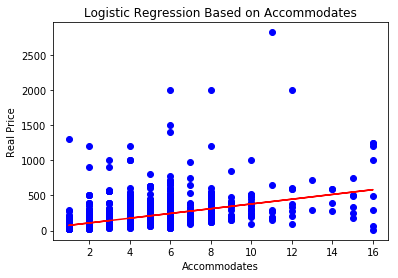

In [125]:
real_price = dc_listings['price']
real_acc = dc_listings['accommodates']
predicted_price = [33.84*i+41 for i in real_acc]

plt.plot(real_acc,real_price,'bo')
plt.plot(real_acc,predicted_price,color="red")
plt.title('Logistic Regression Based on Accommodates')
plt.ylabel('Real Price')
plt.xlabel('Accommodates')
plt.show()

151.23
321.43


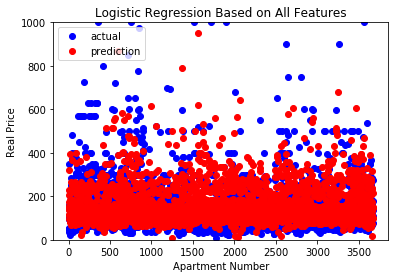

In [112]:
target_fields = ['price']
features, real_price = dc_listings.drop(target_fields, axis=1), dc_listings[target_fields]


predicted_price = [0]*len(real_price)
coef = [20,34,44,-5,-0.32]
j = 0


    
#dc_listings['distance']=np.abs(dc_listings.accommodates-our_acc_value)
#    for i in ['accommodates','bedrooms','bathrooms','beds','number_of_reviews']:

dc_listings['pred'] = dc_listings.accommodates*20+dc_listings.bedrooms*34+dc_listings.bathrooms*44-dc_listings.beds*5-0.32*dc_listings.number_of_reviews+3.23
print(dc_listings['pred'][0])
print(dc_listings['pred'][1])
#first_living_space_value = dc_listings.loc[0,'accommodates']

#dc_listings['predicted'] = dc_listings['accommodates'] + dc_listings['bedrooms'] + dc_listings['bathrooms']
    

    
#predicted_price = [20*i[0]+34*i[1]+44*i[2]-5*i[3]-0.32*i[4]+3.23 for i in features]
x_axis = [i for i in range(len(real_price))]

plt.plot(x_axis,real_price,'bo',label='actual')
plt.plot(x_axis,dc_listings['pred'],'o',color="red",label='prediction')
plt.title('Logistic Regression Based on All Features')
plt.ylabel('Real Price')
plt.legend(loc='upper left')
plt.xlabel('Apartment Number')
ylim(0, 1000) 
plt.show()

In [ ]:
Y_pred = sess.run(y_, feed_dict={X: X_test})
mse = tf.reduce_mean(tf.square(Y_pred - Y_test))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
sess.close()